In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import h5py
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
PROJECT_PATH = '../'
import sys
sys.path.insert(0, PROJECT_PATH)

In [4]:
from PIML.nn.dnn.dnnboxW import DnnBoxW

2022-01-29 22:50:06.020261: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set


In [20]:
d = DnnBoxW()

In [32]:
W="RedM"; Rs=["R"]; Res=5000;step=10;
Rs=DnnBoxW.Rnms
d.init_box(W,Rs, Res,step, topk=50, onPCA=1)

=============================PREPARING M=====================
#220 R=1000.00
sky_H (2204,)
Top eigs  [9.559e+01 6.478e+01 2.803e+01 1.726e+01 9.960e+00 5.480e+00 4.760e+00
 3.310e+00 2.200e+00 1.660e+00 1.400e+00 1.350e+00 1.120e+00 9.900e-01
 8.700e-01 8.000e-01 7.100e-01 5.400e-01 4.900e-01 4.700e-01 4.200e-01
 3.700e-01 3.300e-01 3.100e-01 2.900e-01 2.600e-01 2.500e-01 2.300e-01
 2.200e-01 2.100e-01 1.900e-01 1.900e-01 1.800e-01 1.600e-01 1.400e-01
 1.400e-01 1.300e-01 1.200e-01 1.200e-01 1.100e-01 1.000e-01 1.000e-01
 9.000e-02 9.000e-02 8.000e-02 8.000e-02 8.000e-02 7.000e-02 7.000e-02
 6.000e-02]
Building RBF with gaussan kernel on data shape (7386,)
Building RBF with gaussan kernel on data shape (7386, 50)
error: 1.506373078074949e-06
=============================PREPARING W=====================
#220 R=1000.00
sky_H (2204,)
Top eigs  [1.8023e+02 1.0520e+01 7.7200e+00 2.0400e+00 1.6800e+00 1.1700e+00
 9.0000e-01 7.1000e-01 6.6000e-01 4.8000e-01 4.0000e-01 3.6000e-01
 2.6000e-01 2

In [33]:
d.save_eigv()

In [38]:
d.set_model_R0("R_ep1000_nzD_nl10_lr20_I60_h4_O3_dp002_29_2347")
d.set_model_R0("B_ep1000nzD_nl10_lr20_I60_h4_O3_dp002_29_2345")

In [40]:
ms = ["R_ep1000_nzD_nl10_lr20_I60_h4_O3_dp002_29_2347","B_ep1000nzD_nl10_lr20_I60_h4_O3_dp002_29_2345"]

In [64]:
d.load_train(ms, topk=10)

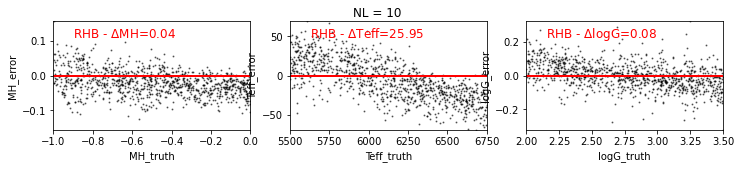

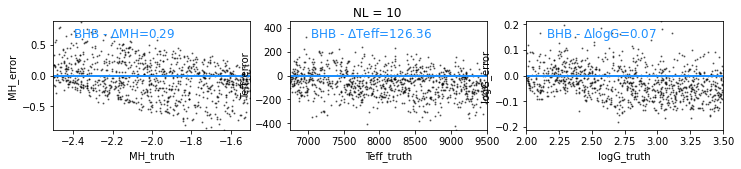

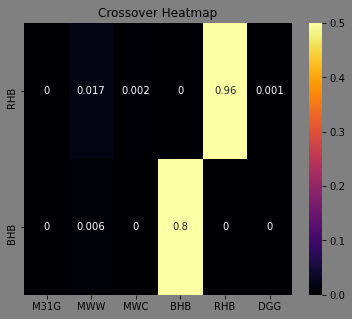

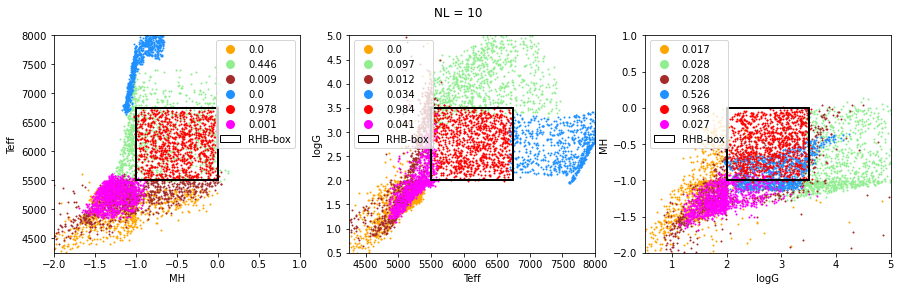

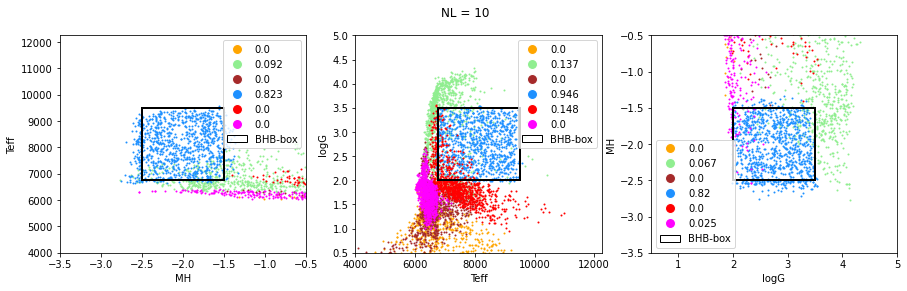

In [82]:
d.test(test_NL=10, nTest=1000)

In [111]:
d.init_train(out_idx=[0,1,2], mtype="NzDNN", train_NL=2, nTrain=1024, nTest=100, log=1)

In [118]:
d.save_eigv()

In [ ]:
d.load_eigv()

Layers: [10, 64, 32, 16, 3]
R_nzD_lr20_I10_h3_O3_dp002_29_2221


2022-01-29 22:21:19.988320: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-01-29 22:21:19.988354: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-01-29 22:21:19.988389: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.


generating (1024, 10) training data for RHB
| EP 2 |loss: 0.1825 | mean_: 0.1825 | 
saving model to:  /home/swei20/PhysicsInformedML/models/R_nzD_lr20_I10_h3_O3_dp002_29_2221/model.h5


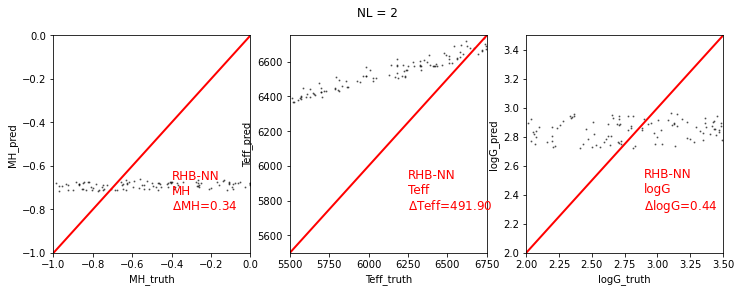

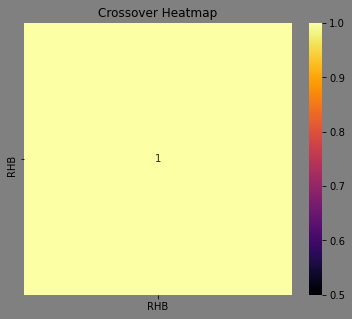

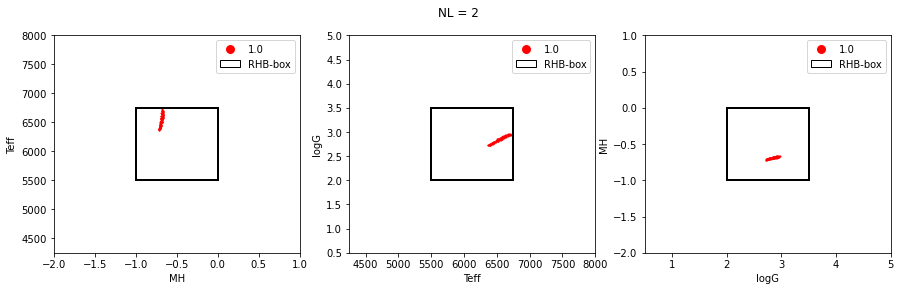

In [112]:
d.run(lr=0.01, dp=0.02, batch=512, nEpoch=2, verbose=0)

In [96]:
mm = d.load_model("R_DNN_lr20_I10_h3_O3_dp002_29-2203")

In [97]:
mm.

In [79]:
m.model.save

<bound method Model.save of <tensorflow.python.keras.engine.functional.Functional object at 0x7fc63e5d9f40>>

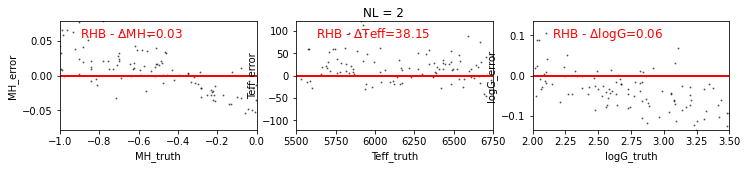

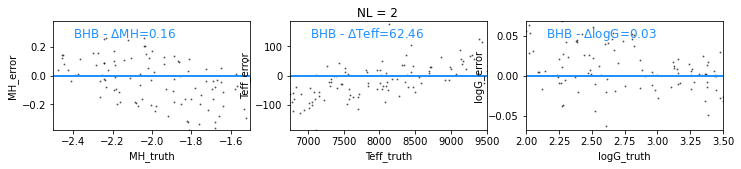

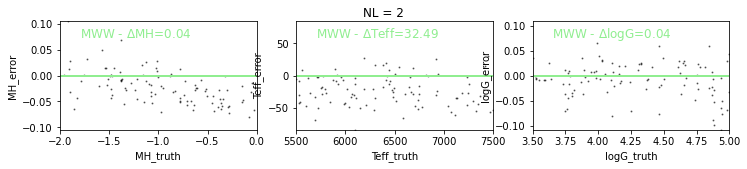

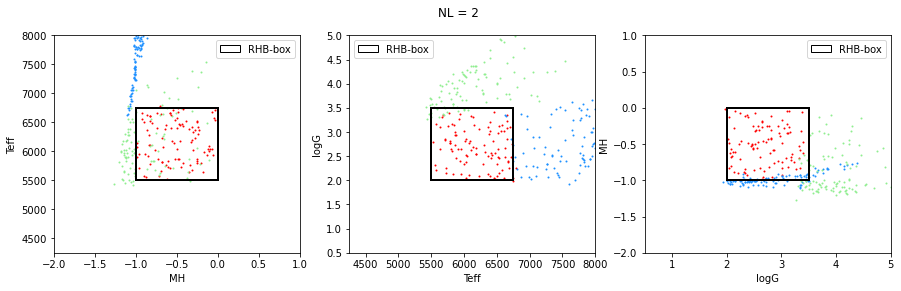

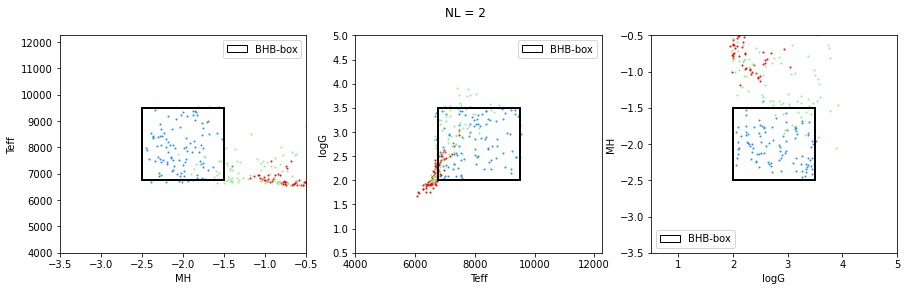

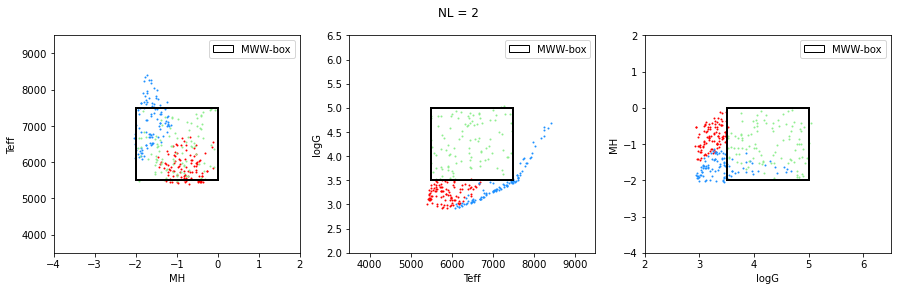

In [35]:
d.init_eval()

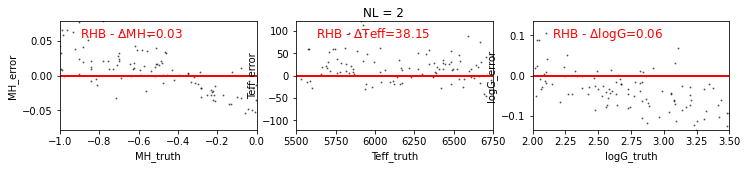

In [33]:
d.eval_acc_R0("R", vertical=1)

In [55]:
isinstance(d.Rs, (list, np.ndarray))

True

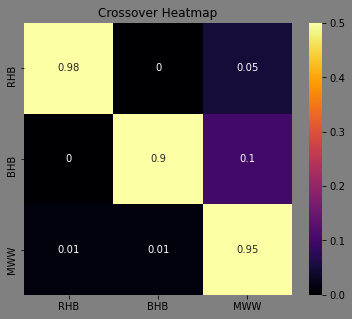

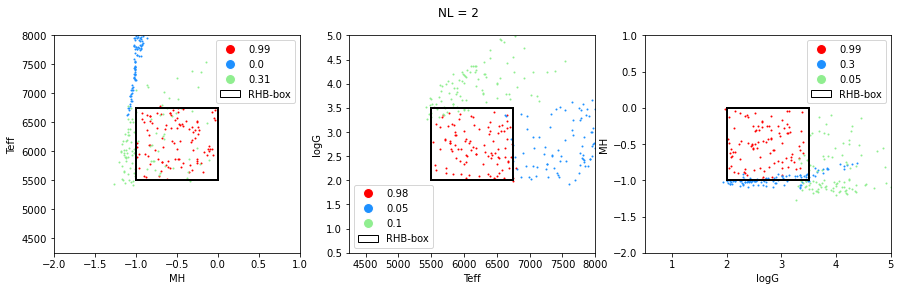

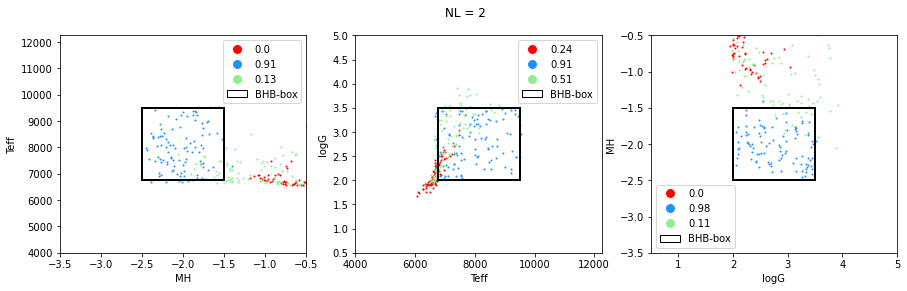

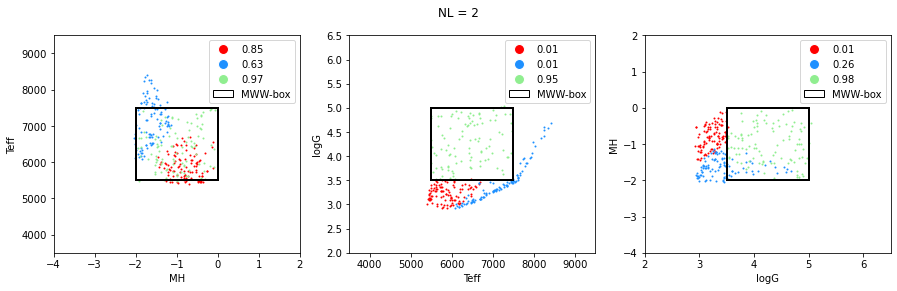

In [63]:
d.eval_box(d.p_pred)

In [59]:
mask=d.PLT.get_crossover_R0_R1("R", d.p_pred["R"]["W"])

In [52]:
c

0.05

In [60]:
mask

(0.05, array([31., 10.,  5.]))

In [ ]:
NL=10

In [ ]:
pcflux, rands, pmts,= b.prepare_trainset(10, noise_level=NL, add_noise=1)

generating (10, 20) training data for RHB
generating (10, 20) training data for BHB


In [ ]:
pcflux0, rands, pmts,= b.prepare_trainset(10, noise_level=NL, add_noise=0, pmts=pmts)

generating (10, 20) training data for RHB
generating (10, 20) training data for BHB


In [ ]:
tx, tp = b.prepare_testset(10, noise_level=NL)

In [ ]:
R0 = "B"
pcflux0[R0][0][0], pcflux[R0][0]

(array([-2.58234961e+00, -4.10375554e-01,  5.53518213e-01,  1.47398790e-01,
         2.10851841e-02,  1.07199400e-01,  8.18364856e-02,  4.24131506e-02,
         6.77628516e-02, -8.48216282e-03, -2.66841570e+00,  2.70072075e-01,
         5.42803012e-02,  2.20932168e-02, -6.22379032e-04, -3.81962563e-04,
         9.98870953e-03, -2.35257077e-03, -1.46767059e-03,  3.12387435e-04]),
 array([-2.58177125e+00, -4.12622282e-01,  5.49984761e-01,  1.48805381e-01,
         2.14084629e-02,  1.11250132e-01,  8.34975248e-02,  4.16391667e-02,
         6.95797415e-02, -7.67040597e-03, -2.66782431e+00,  2.68806361e-01,
         5.67666619e-02,  2.59325129e-02, -1.40406415e-03, -1.41644925e-03,
         9.99030711e-03, -1.84681569e-03,  1.72828297e-04,  2.70661961e-03]))